In [2]:
import pandas as pd
df=pd.read_csv(r'spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [6]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [7]:
new_df=df.drop(columns=['Unnamed: 0','label'])
new_df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [9]:
from sklearn.model_selection import train_test_split
X=new_df['text']
y=new_df['label_num']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(4136,) (1035,)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english')

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)
print(X_train.shape, X_test.shape)

(4136, 44934) (1035, 44934)


In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

LogisticRegression()

In [14]:
model.fit(X_train,y_train) #training the model using X_train,y_train

LogisticRegression()

In [16]:
y_pred=model.predict(X_test) #testing the model using X_test

In [19]:
from sklearn.metrics import accuracy_score
Accuracy=accuracy_score(y_test,y_pred)

print(f'Accuracy: {Accuracy:.2f}')

Accuracy: 0.99


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.98      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



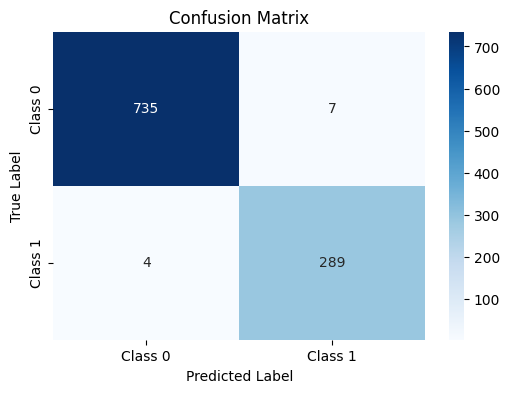

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()